<a href="https://colab.research.google.com/github/Suvam7407/GitHub-Projects/blob/master/Height_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#supervised machine learning
# linear Regression model
#when x=10,we need to predict the y value
#knowledge discovery process[kdp]
#step-1:load dataset
import numpy as np
import pandas as pd


Saving height-weight.csv to height-weight.csv


In [0]:

df = pd.read_csv('height-weight.csv')
df
# Dataset is now stored in a Pandas Dataframe

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [0]:
#data exploration
#check the columns names
print(df.columns )

Index(['Height', 'Weight'], dtype='object')


In [0]:
#check the dimention
df.shape

(15, 2)

In [0]:
#info the statistical summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
Height    15 non-null float64
Weight    15 non-null float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [0]:
#check the missing value
df.isna().any()

Height    False
Weight    False
dtype: bool

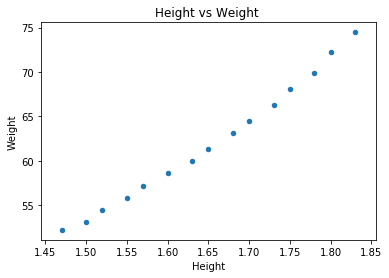

In [0]:
#step2-selection
#independent variable and dependent variable
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind="scatter",x="Height",y="Weight",title="Height vs Weight ")

In [0]:
#correlation between two variable
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


In [0]:
#step-3-->preprocessing
#use is.null() method if dataset have any null value ,it will be true else false
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [0]:
# Normalization / MIN - MAX Scaling
# Changing the scale of multiple variables to a same range (0-1)
#Heightnorm = (Height - Heightmin) / (Heightmax - Heightmin)

# Dependent Variable
weight=df.Weight.values
weight

array([52.21, 53.12, 54.48, 55.84, 57.2 , 58.57, 59.93, 61.29, 63.11,
       64.47, 66.28, 68.1 , 69.92, 72.19, 74.46])

In [0]:
#independent variable
height=df.Height.values[:,np.newaxis]
height

array([[1.47],
       [1.5 ],
       [1.52],
       [1.55],
       [1.57],
       [1.6 ],
       [1.63],
       [1.65],
       [1.68],
       [1.7 ],
       [1.73],
       [1.75],
       [1.78],
       [1.8 ],
       [1.83]])

In [0]:
#we need to find height.min(),height.max(),xheight-norm
Heightmin=height.min()
Heightmax=height.max()
Heightnorm=(height-Heightmin)/(Heightmax-Heightmin)
Heightnorm

array([[0.        ],
       [0.08333333],
       [0.13888889],
       [0.22222222],
       [0.27777778],
       [0.36111111],
       [0.44444444],
       [0.5       ],
       [0.58333333],
       [0.63888889],
       [0.72222222],
       [0.77777778],
       [0.86111111],
       [0.91666667],
       [1.        ]])

In [0]:
#same way we need to find weight.min,weight.max,weight-norm
Weightmin=weight.min()
Weightmax=weight.max()
Weightnorm=(weight-Weightmin)/(Weightmax-Weightmin)
Weightnorm

array([0.        , 0.04089888, 0.10202247, 0.16314607, 0.22426966,
       0.2858427 , 0.34696629, 0.40808989, 0.48988764, 0.55101124,
       0.63235955, 0.7141573 , 0.79595506, 0.89797753, 1.        ])

In [0]:
# Stage 5 : Data Mining
# Identification an equation which can predict Test_Grade on the basis on Hours_Studied
# Linear Regression : Y = a + bX
'''A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable 
and Y is the dependent variable.
The slope of the line is b, and a is the intercept (the value of y when x = 0).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
'''
import sklearn.linear_model as lm
#classifer object
lr=lm.LinearRegression()
# Train Our Model
# Fitting Of a Linear Regression Model
lr.fit(height,weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#predict the value of weight with respect to height
knownvalue=int(input("Enter the value of height:"))
findvalue=lr.predict([[knownvalue]])
print("when the height value is",knownvalue,"that moment weight value is",findvalue)

Enter the value of height:2
when the height value is 2 that moment weight value is [83.48241717]


In [0]:
#after prediction ,we added the predicted value into df 
df["predicted_value"]=lr.predict(height)
df

,Height,Weight,predicted_value
0,1.47,52.21,51.008158
1,1.50,53.12,52.846324
2,1.52,54.48,54.071768
3,1.55,55.84,55.909933
4,1.57,57.20,57.135377
5,1.60,58.57,58.973543
6,1.63,59.93,60.811708
7,1.65,61.29,62.037152
8,1.68,63.11,63.875317
9,1.70,64.47,65.100761


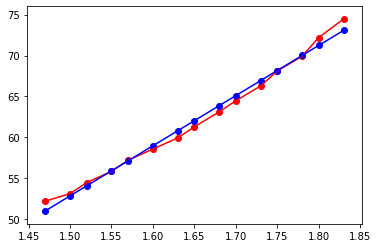

In [0]:
#plot a graph where actualvalue of x vs actualvalue of y
plt.plot(height,weight,color="red")
plt.scatter(height,weight,color="red")
#plot a graph after prediction of y,actualvalue of x vs predicted value of y
plt.plot(height,lr.predict(height),color="blue")
plt.scatter(height,lr.predict(height),color="blue")

In [0]:
#Accuracy of this model
from sklearn.metrics import r2_score
accuracy=r2_score(weight,lr.predict(height))
print("the model accuracy is",accuracy*100,"%")

the model accuracy is 98.91969224457968 %
